# Deskripsi Dataset

- **Konteks**
Sebuah model respons dapat memberikan dorongan signifikan terhadap efisiensi kampanye pemasaran dengan meningkatkan respons atau mengurangi biaya. Tujuannya adalah untuk memprediksi siapa yang akan merespons tawaran untuk produk atau layanan.  
  
**Isi**  
- **AcceptedCmp1** - 1 jika pelanggan menerima tawaran dalam kampanye pertama, 0 jika tidak
- **AcceptedCmp2** - 1 jika pelanggan menerima tawaran dalam kampanye kedua, 0 jika tidak
- **AcceptedCmp3** - 1 jika pelanggan menerima tawaran dalam kampanye ketiga, 0 jika tidak
- **AcceptedCmp4** - 1 jika pelanggan menerima tawaran dalam kampanye keempat, 0 jika tidak
- **AcceptedCmp5** - 1 jika pelanggan menerima tawaran dalam kampanye kelima, 0 jika tidak
- **Response (target)** - 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 jika tidak
- **Complain** - 1 jika pelanggan mengeluh dalam 2 tahun terakhir
- **DtCustomer** - tanggal pendaftaran pelanggan dengan perusahaan
- **Education** - tingkat pendidikan pelanggan
- **Marital** - status pernikahan pelanggan
- **Kidhome** - jumlah anak kecil dalam rumah tangga pelanggan
- **Teenhome** - jumlah remaja dalam rumah tangga pelanggan
- **Income** - pendapatan tahunan rumah tangga pelanggan
- **MntFishProducts** - jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
- **MntMeatProducts** - jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir
- **MntFruits** - jumlah yang dihabiskan untuk produk buah dalam 2 tahun terakhir
- **MntSweetProducts** - jumlah yang dihabiskan untuk produk manis dalam 2 tahun terakhir
- **MntWines** - jumlah yang dihabiskan untuk produk anggur dalam 2 tahun terakhir
- **MntGoldProds** - jumlah yang dihabiskan untuk produk emas dalam 2 tahun terakhir
- **NumDealsPurchases** - jumlah pembelian yang dibuat dengan diskon
- **NumCatalogPurchases** - jumlah pembelian yang dibuat menggunakan katalog
- **NumStorePurchases** - jumlah pembelian yang dibuat langsung di toko
- **NumWebPurchases** - jumlah pembelian yang dibuat melalui situs web perusahaan
- **NumWebVisitsMonth** - jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir
- **Recency** - jumlah hari sejak pembelian terakhir  

**Inspirasi**
Tujuan utamanya adalah untuk melatih model prediktif yang memungkinkan perusahaan untuk memaksimalkan keuntungan dari kampanye pemasaran berikutnya.

In [84]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [85]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [87]:
df.shape

(2240, 30)

Hasil `df.shape` menunjukkan bahwa DataFrame `df` memiliki 2240 baris dan 30 kolom. Ini berarti DataFrame tersebut terdiri dari 2240 data (baris) dan 30 fitur (kolom).

## Descriptive statistics

In [88]:
nums = []
cats = []

for column in df :
  if df[column].dtypes in ['int64', 'float64'] :
    nums.append(column)
  else :
    cats.append(column)

num_count = len(nums)
cat_count = len(cats)

print('Number of numerical columns:', num_count)
print('Number of categorical columns:', cat_count)
print('-' * 70)
print('Numerical columns:', nums)
print('Categorical columns:', cats)

Number of numerical columns: 27
Number of categorical columns: 3
----------------------------------------------------------------------
Numerical columns: ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Categorical columns: ['Education', 'Marital_Status', 'Dt_Customer']


### Check dataset

In [89]:
list_item_u = []
for col in df.columns:
    list_item_u.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
df_desc = pd.DataFrame(data=list_item_u, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
df_desc

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.000000,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.000000,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.000000,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.000000,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.071429,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.000000,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.000000,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16]"


Dari dataset yang diberikan kesimpulan sebagai berikut:

1. Dataset terdiri dari 2240 baris dan 30 kolom.
2. Terdapat beberapa kolom dengan data yang beragam, seperti 'Education' (5 unique values), 'Marital_Status' (6 unique values), dan 'Dt_Customer' (663 unique values).
3. Kolom 'Income' memiliki 24% data yang hilang (NaN).
4. Mayoritas pelanggan memiliki 0 anak di rumah (Kidhome) dan 0 remaja di rumah (Teenhome).
5. Mayoritas pelanggan memiliki 0 komplain (Complain).
6. Kolom 'Z_CostContact' dan 'Z_Revenue' memiliki nilai yang konstan (3 dan 11), sehingga mungkin tidak memberikan informasi yang berguna untuk analisis.
7. Kolom 'Response' merupakan target variabel yang akan dijadikan acuan dalam model prediksi atau analisis selanjutnya.

# Feature Engineering

In [90]:
df_prep = df.copy()

In [91]:
# date
df_prep['Dt_Customer'] = pd.to_datetime(df_prep['Dt_Customer'])

# age
df_prep['Age'] = 2022 - df_prep['Year_Birth']

# children
df_prep['children'] = df_prep['Kidhome'] + df_prep['Teenhome']

# is parent
df_prep['is_parent'] = np.where(df_prep['children']>0, 1, 0)

# Total of accepted campaign
df_prep['total_accepted_campaign']  = df_prep.loc[:, df_prep.columns.str.contains('AcceptedCmp')].sum(axis=1)

# Total Spending
df_prep['total_spent'] = df_prep[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Total Purchase Order except NumWebVisitsMonth
df_prep['total_transaksi'] = df_prep[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Age Group
age_group = []
for i in df_prep['Age']:
    if i < 35:
        group = 'Young Adult'
    elif 35 <= i < 65:
        group = 'Adult'
    else:
        group = ' Senior Adult'
    age_group.append(group)
    
df_prep['age_group'] = age_group

# Conversion rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y
df_prep['conversion_rate'] = df_prep.apply(lambda x: cvr(x['total_transaksi'],x['NumWebVisitsMonth']), axis=1)


# Total Years joined
df_prep['membership_duration'] = 2022 - df_prep['Dt_Customer'].dt.year

In [92]:
df_prep.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [93]:
df_prep.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,Age,children,is_parent,total_accepted_campaign,total_spent,total_transaksi,age_group,conversion_rate,membership_duration
0,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,...,1,65,0,0,0,1617000,25,Senior Adult,3.571429,10
1,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,...,0,68,2,1,0,27000,6,Senior Adult,1.200000,8
2,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,...,0,57,0,0,0,776000,21,Adult,5.250000,9
3,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,...,0,38,1,1,0,53000,8,Adult,1.333333,8
4,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,...,0,41,1,1,0,422000,19,Adult,3.800000,8


# EDA

In [94]:
df_eda = df_prep.copy()

In [95]:
df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'children', 'total_accepted_campaign']] = df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                                                                                                                                                                'Response', 'Complain', 'children', 'total_accepted_campaign']].astype('object')
cats = []
nums = []
date = []
for col in df_eda.columns: 
    if df_eda[col].dtype == 'O':
        cats.append(col)
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        nums.append(col)
    else:
        date.append(col)

In [96]:
len(df_eda[date].columns)

2

## Univariate Analysis

### Numerical

<Figure size 800x550 with 0 Axes>

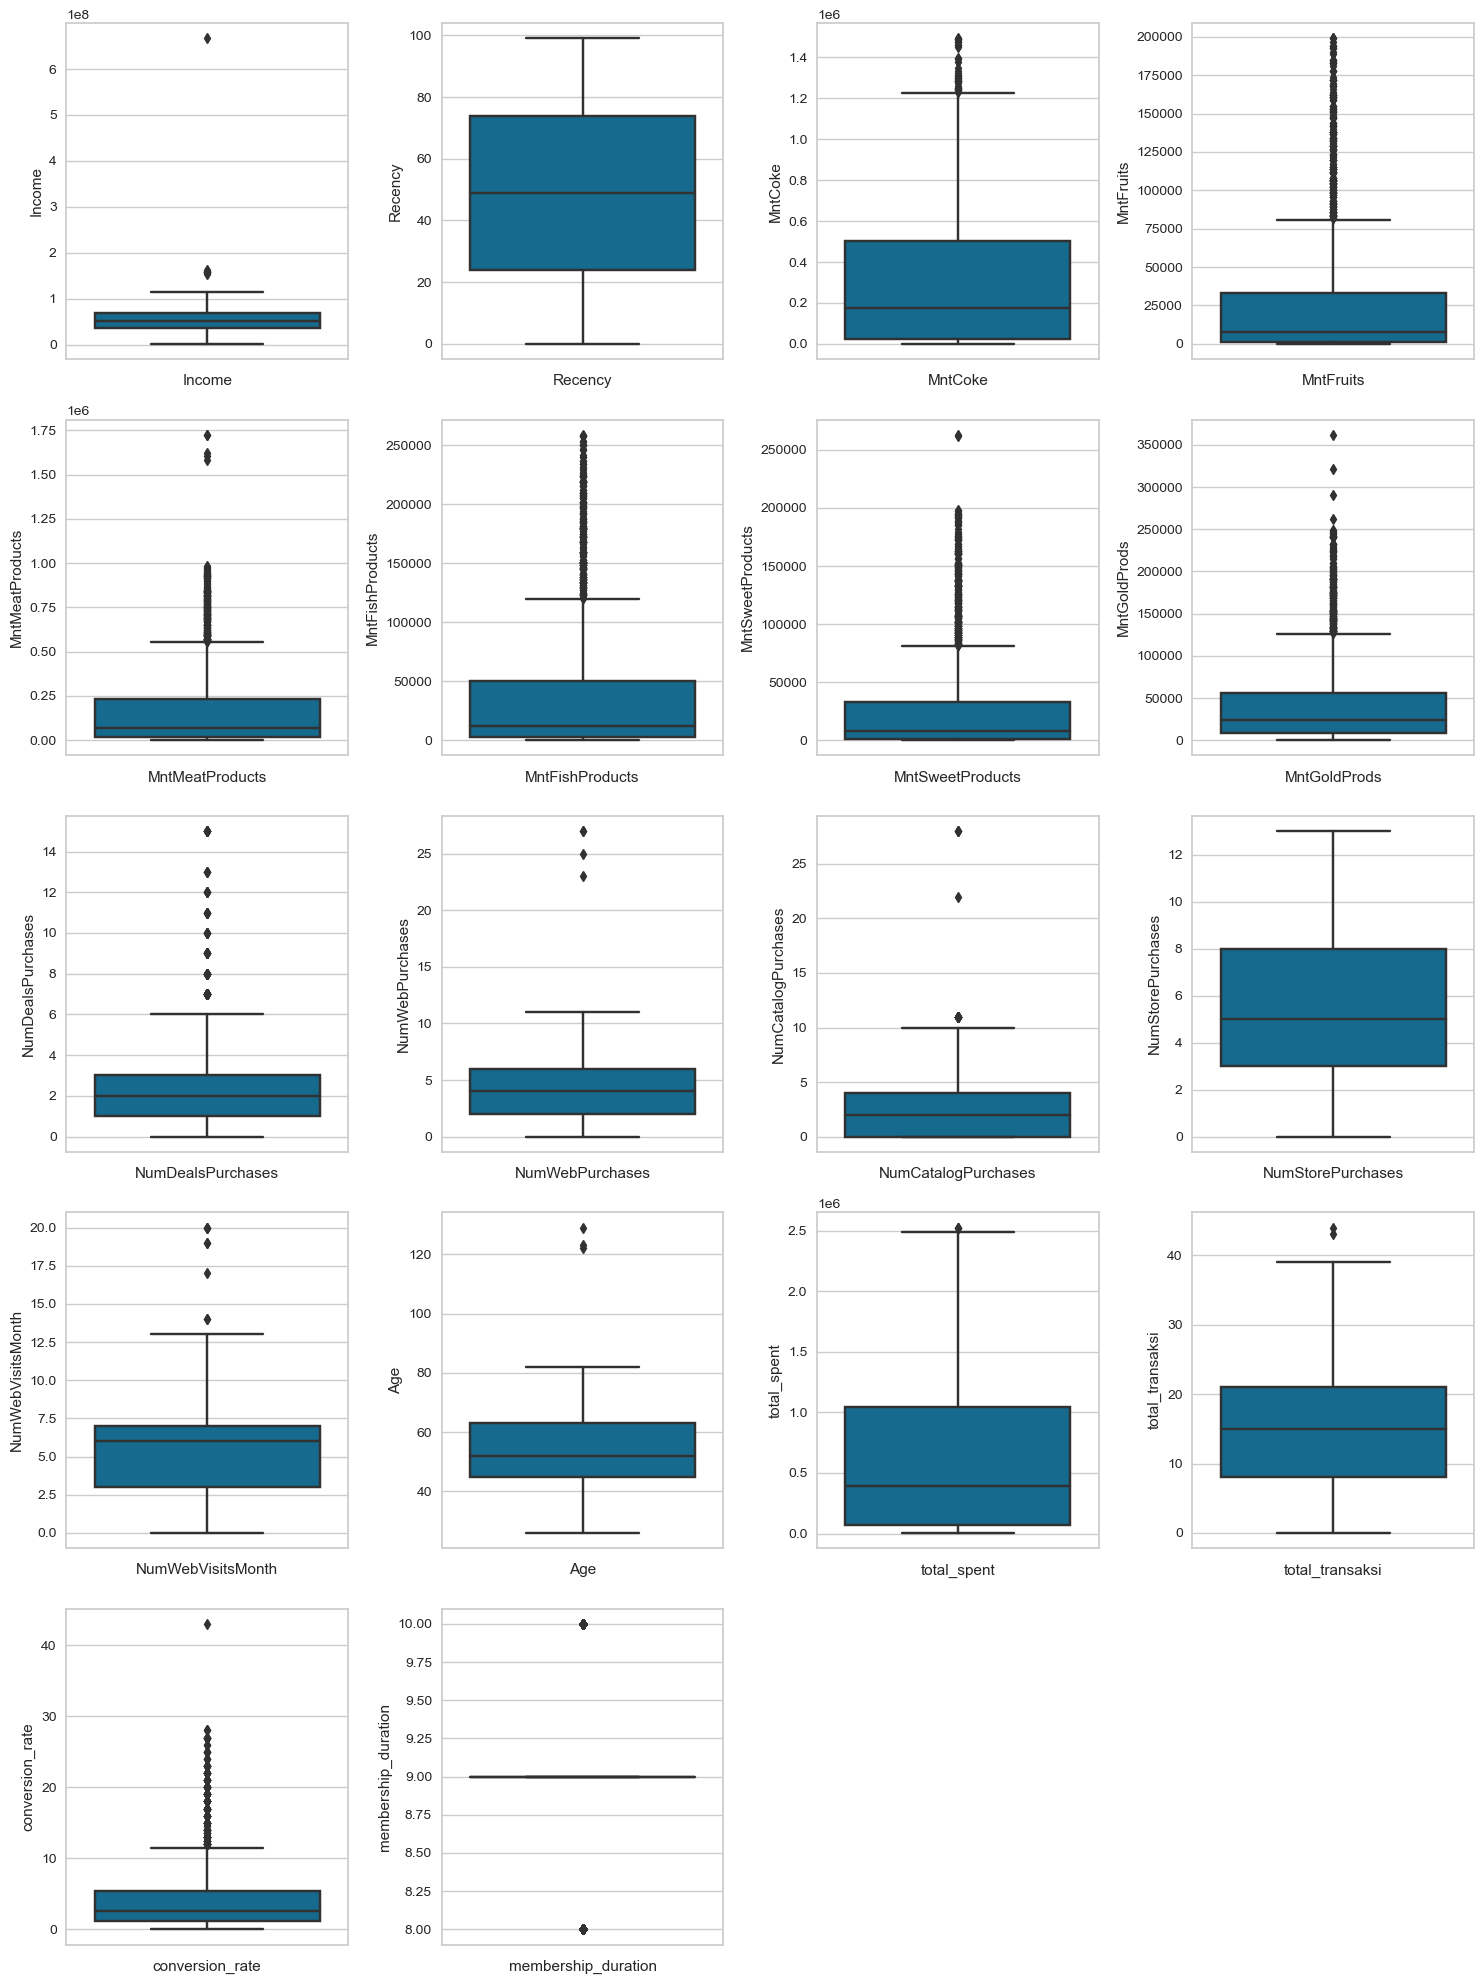

In [97]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.figure(figsize=(15, 20))
for i, col in enumerate(nums):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df_eda[col])
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Categorical

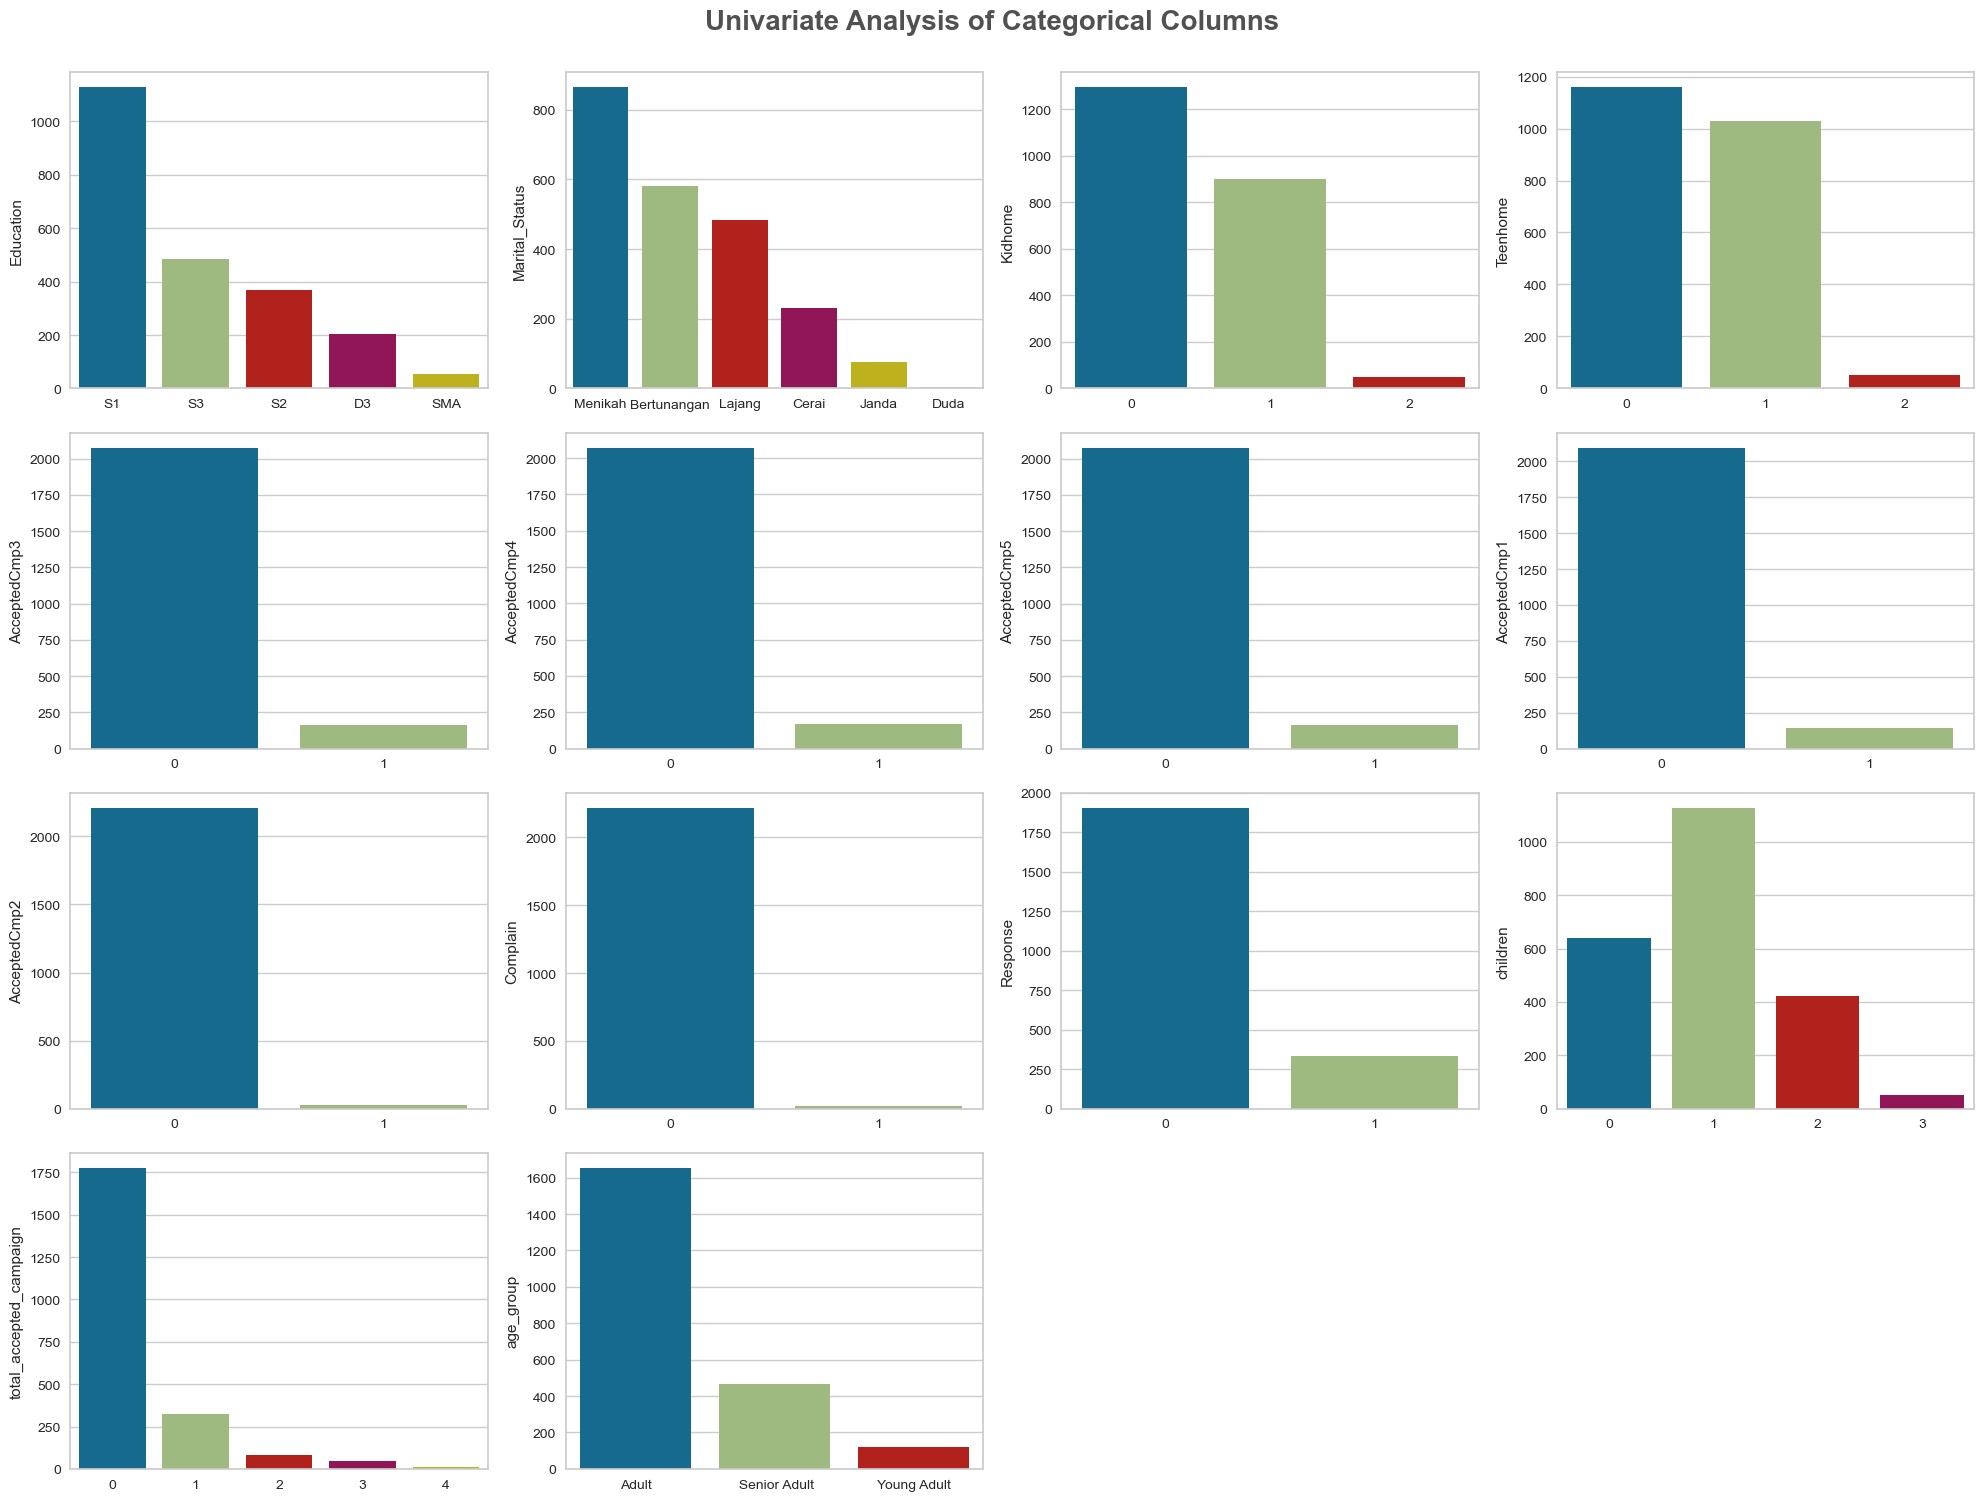

In [98]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cats)):
    plt.subplot(4, 4, i+1)
    sns.barplot(x=df_eda[cats[i]].value_counts().index, y=df_eda[cats[i]].value_counts())

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [99]:
# conversion rate dan age group

cvr_agr = df_eda.groupby(['age_group']).agg({'conversion_rate':'sum'}).reset_index()
cvr_agr['cvr_sum'] = cvr_agr['conversion_rate'].sum()
cvr_agr['percentage'] = round((cvr_agr['conversion_rate']/cvr_agr['cvr_sum'])*100,2)
cvr_agr

,age_group,conversion_rate,cvr_sum,percentage
0,Senior Adult,2518.063889,9845.297974,25.58
1,Adult,6674.321345,9845.297974,67.79
2,Young Adult,652.912740,9845.297974,6.63


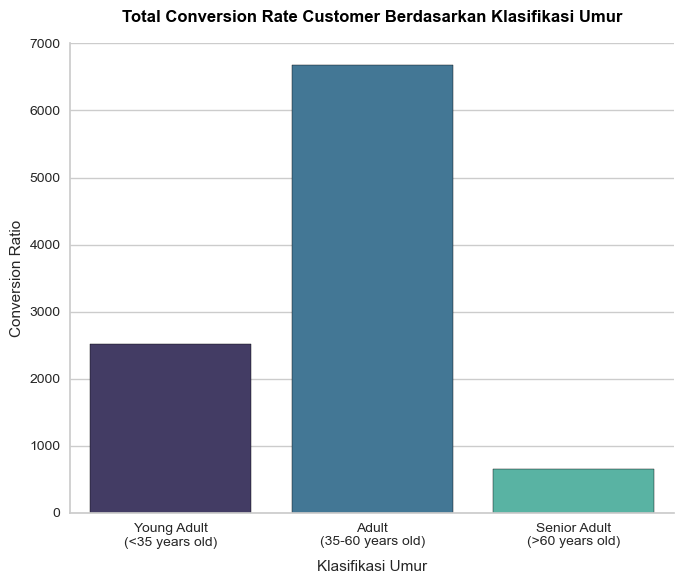

In [100]:
fig, ax = plt.subplots(figsize=(7, 6))
plt.title("Total Conversion Rate Customer Berdasarkan Klasifikasi Umur", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='age_group', y='conversion_rate', data=cvr_agr, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Klasifikasi Umur', labelpad=8)
plt.xticks(np.arange(3), ['Young Adult\n(<35 years old)', 'Adult\n(35-60 years old)', 'Senior Adult\n(>60 years old)'])

sns.despine()
plt.tight_layout()
plt.show()

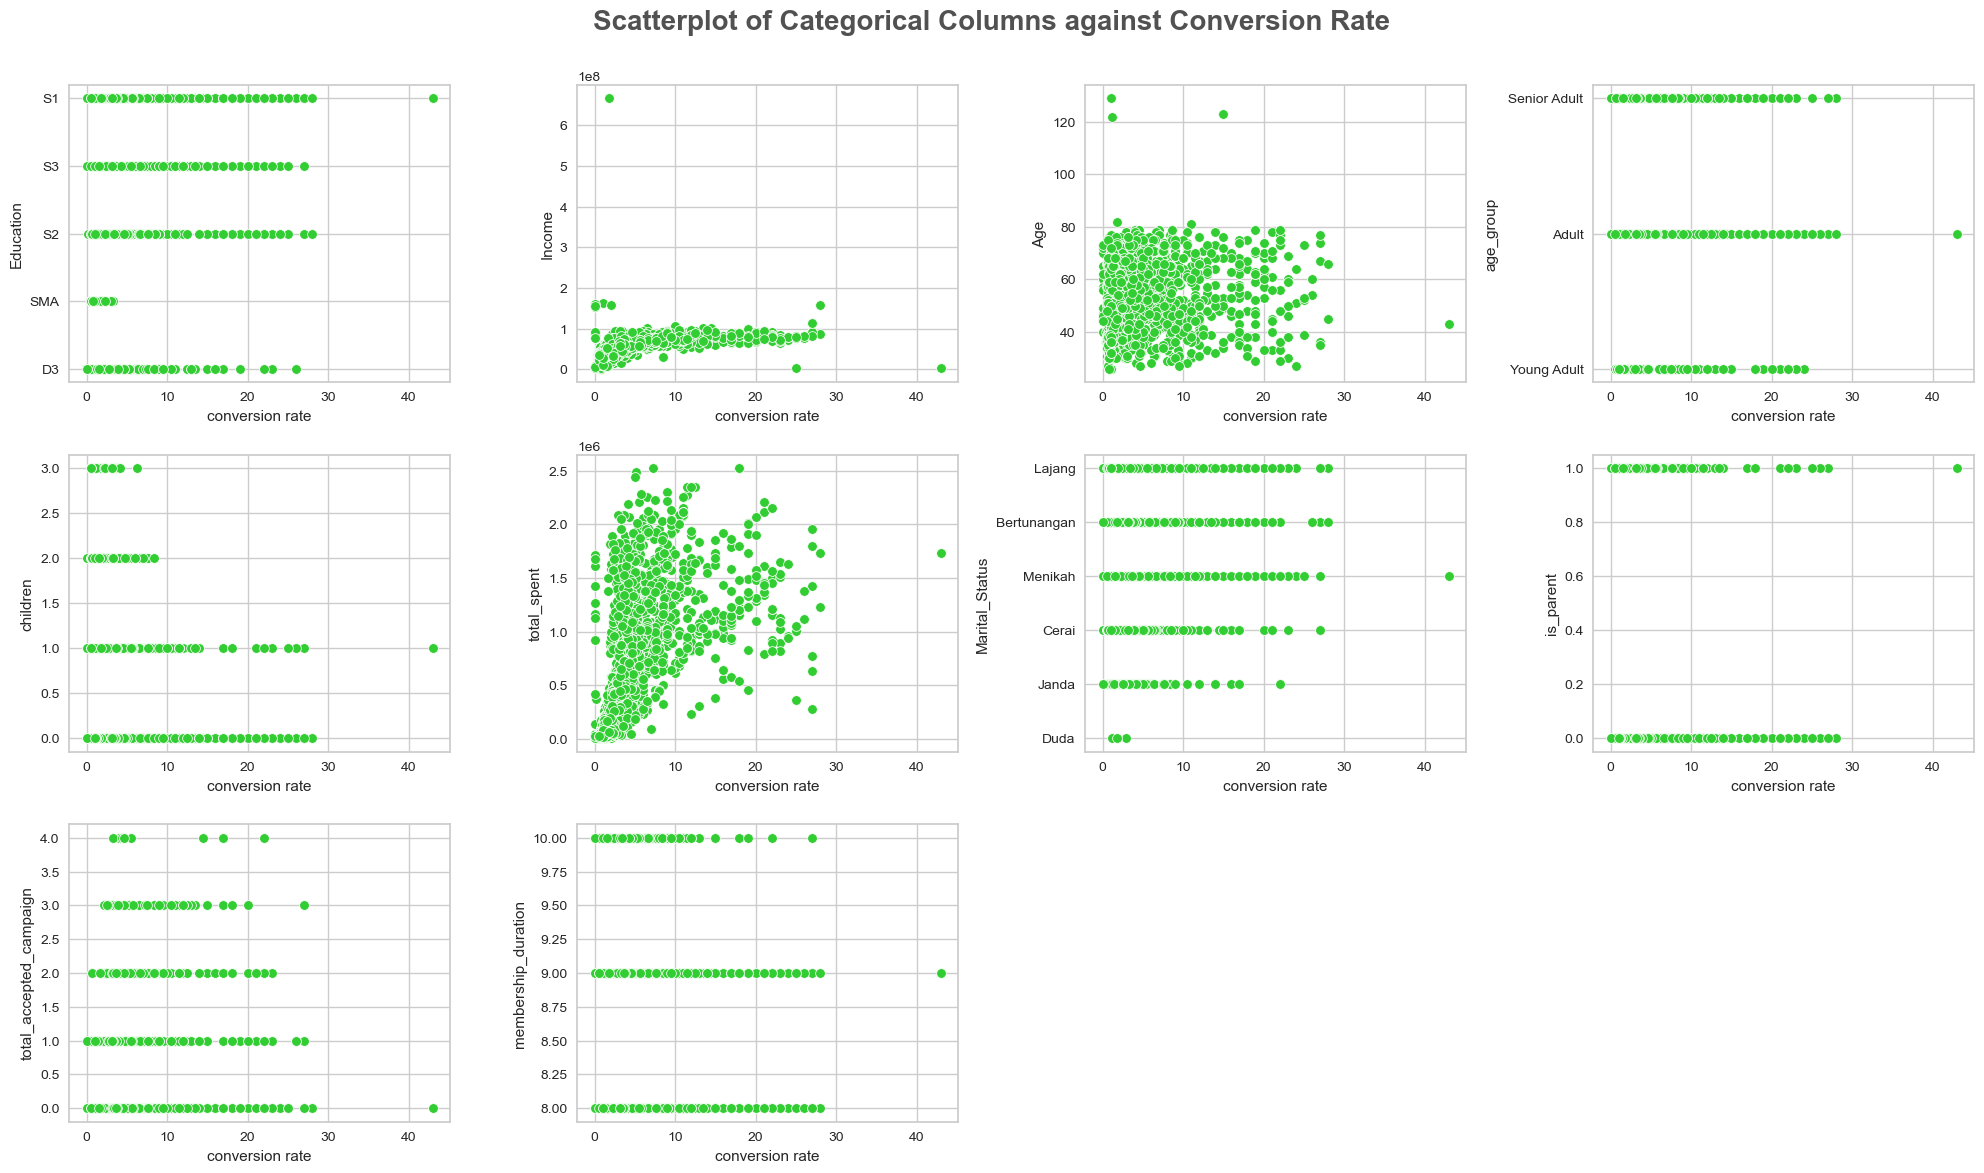

In [101]:
cat=['Education','Income', 'Age', 'age_group', 'children', 'total_spent', 'Marital_Status', 'is_parent', 'total_accepted_campaign','membership_duration']

plt.figure(figsize=(20, 15))
plt.suptitle('Scatterplot of Categorical Columns against Conversion Rate', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat)):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=df_eda['conversion_rate'], y=df_eda[cat[i]], color='limegreen')
    plt.xlabel('conversion rate')

plt.tight_layout()
plt.show()

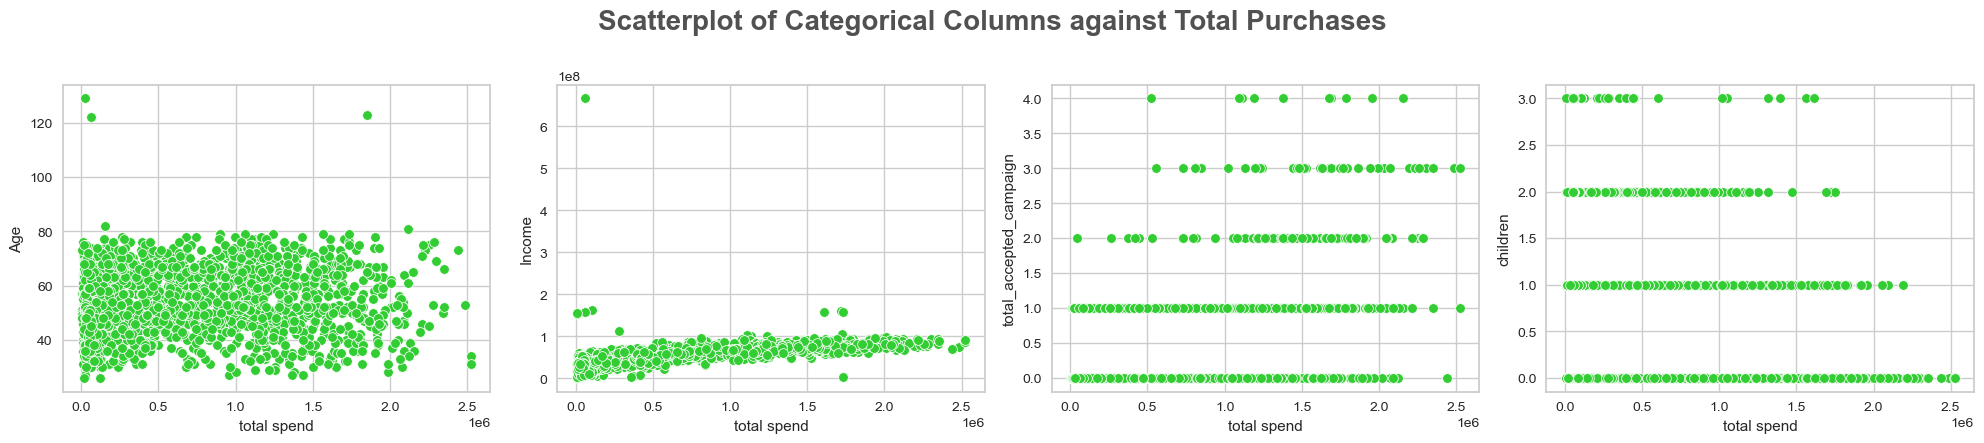

In [102]:
cat2=['Age', 'Income', 'total_accepted_campaign', 'children']

plt.figure(figsize=(20, 15))
plt.suptitle('Scatterplot of Categorical Columns against Total Purchases', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat2)):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=df_eda['total_spent'], y=df_eda[cat2[i]], color='limegreen')
    plt.xlabel('total spend')

plt.tight_layout()
plt.show()

## Multivariate Analysis

<Axes: >

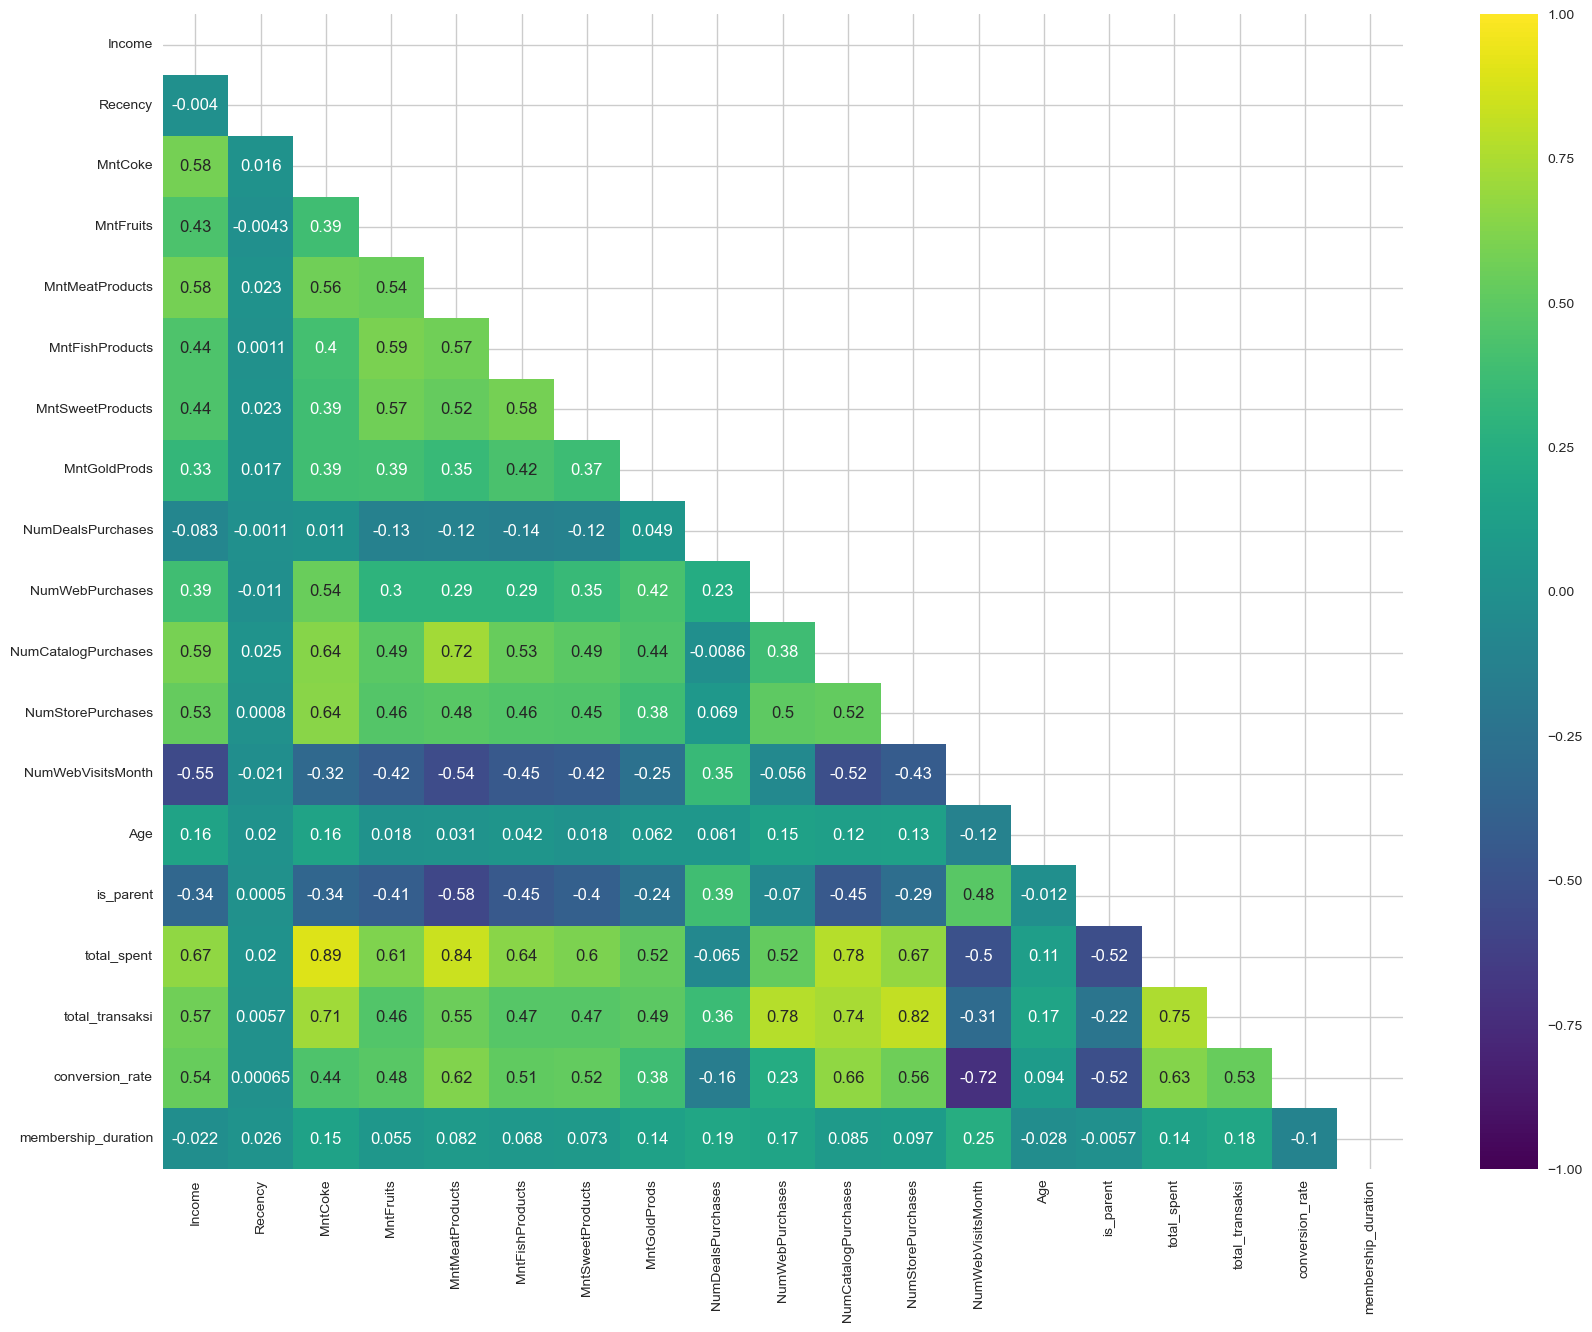

In [103]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df_eda.corr(), dtype=bool))
sns.heatmap(df_eda.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')

# Data Cleaning

In [104]:
df_clean = df_eda.copy()

In [105]:
missing_count = df_clean.isnull().sum()

# Menghitung persentase missing value pada setiap kolom
missing_percentage = round((df_clean.isnull().sum() / len(df_clean)) * 100,2)

# Menggabungkan kedua Series ke dalam DataFrame
missing_df = pd.concat([missing_count, missing_percentage], axis=1)
missing_df.columns = ['Jumlah Missing Value', 'Persentase (%)']

# Menampilkan kolom-kolom yang memiliki nilai null beserta persentase missing valuenya
missing_df[missing_df['Jumlah Missing Value'] > 0]

,Jumlah Missing Value,Persentase (%)
Income,24,1.07


In [106]:
# Mencari Nilai Null dengan Whitespace dalam DataFrame 
white_space = []
for col in df_clean.columns:
    for val in df_clean[col]:
        if isinstance(val, str) and '  ' in val:
            white_space.append(val)

# Output
print(white_space)

[]


In [107]:
df.duplicated().sum()

0

In [108]:
df_clean.dropna(subset=['Income'], inplace=True)

In [109]:
print('Apakah Masih ada nilai null?',df_clean.isna().sum().any())

Apakah Masih ada nilai null? False


# Data Preparation

In [110]:
df_cast = df_clean.copy()

## Handling Outlier

In [111]:
from scipy import stats

# Define the list of features
features = ['Income', 'Age']

print(f'Total Baris sebelum melakukan Handling Outlier = {len(df_cast)}')

handling_outlier = np.array([True] * len(df_cast))

for col in features:
    zscore = abs(stats.zscore(df_cast[col]))
    handling_outlier = (zscore < 3) & handling_outlier
    
df_cast = df_cast[handling_outlier] 

print(f'Total Baris setelah melakukan Handling Outlier = {len(df_cast)}')

Total Baris sebelum melakukan Handling Outlier = 2216
Total Baris setelah melakukan Handling Outlier = 2205


## Feature Encoding

In [112]:
# Label Encoding
mapping_education = {
    'SMA': 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df_cast['mapp_education'] = df_cast['Education'].map(mapping_education)

In [113]:
# One Hot Encoding

for category in ['age_group', 'Marital_Status']:
    onehots = pd.get_dummies(df_cast[category], prefix=category)
    df_cast = df_cast.join(onehots)
df_cast.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,mapp_education,age_group_ Senior Adult,age_group_Adult,age_group_Young Adult,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,...,2,1,0,0,0,0,0,0,1,0
1,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,...,2,1,0,0,0,0,0,0,1,0
2,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,...,2,0,1,0,1,0,0,0,0,0
3,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,...,2,0,1,0,1,0,0,0,0,0
4,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,...,4,0,1,0,0,0,0,0,0,1


In [114]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Education                   2205 non-null   object        
 1   Marital_Status              2205 non-null   object        
 2   Income                      2205 non-null   float64       
 3   Kidhome                     2205 non-null   object        
 4   Teenhome                    2205 non-null   object        
 5   Dt_Customer                 2205 non-null   datetime64[ns]
 6   Recency                     2205 non-null   int64         
 7   MntCoke                     2205 non-null   int64         
 8   MntFruits                   2205 non-null   int64         
 9   MntMeatProducts             2205 non-null   int64         
 10  MntFishProducts             2205 non-null   int64         
 11  MntSweetProducts            2205 non-null   int64       

## Standarization

In [115]:
# membagi data berdasarkan type datanya
categorical = df_cast.select_dtypes(include='object')
numerical = df_cast.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = categorical.columns.to_list()

print("Data numerikal: ", numerical_cols)
print("Data categorical: ", category_cols)

Data numerikal:  ['Income', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'is_parent', 'total_spent', 'total_transaksi', 'conversion_rate', 'membership_duration', 'mapp_education', 'age_group_ Senior Adult', 'age_group_Adult', 'age_group_Young Adult', 'Marital_Status_Bertunangan', 'Marital_Status_Cerai', 'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Lajang', 'Marital_Status_Menikah']
Data categorical:  ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'children', 'total_accepted_campaign', 'age_group']


In [116]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = df_cast.copy()

for col in numerical:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head())

(2205, 44)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,mapp_education,age_group_ Senior Adult,age_group_Adult,age_group_Young Adult,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,S1,Lajang,0.314651,0,0,-1.974128,0.310830,0.974566,1.548614,1.748400,...,-0.456565,1.958450,-1.683681,-0.238845,-0.589047,-0.341256,-0.036911,-0.188938,1.910994,-0.795062
1,S1,Lajang,-0.254877,1,1,1.664957,-0.380600,-0.874776,-0.638664,-0.731678,...,-0.456565,1.958450,-1.683681,-0.238845,-0.589047,-0.341256,-0.036911,-0.188938,1.910994,-0.795062
2,S1,Bertunangan,0.965354,0,0,0.172330,-0.795458,0.355155,0.568110,-0.175957,...,-0.456565,-0.510608,0.593937,-0.238845,1.697658,-0.341256,-0.036911,-0.188938,-0.523288,-0.795062
3,S1,Bertunangan,-1.206087,1,0,1.923048,-0.795458,-0.874776,-0.563241,-0.667380,...,-0.456565,-0.510608,0.593937,-0.238845,1.697658,-0.341256,-0.036911,-0.188938,-0.523288,-0.795062
4,S3,Menikah,0.322136,1,0,0.821859,1.555404,-0.394659,0.417263,-0.217292,...,1.536950,-0.510608,0.593937,-0.238845,-0.589047,-0.341256,-0.036911,-0.188938,-0.523288,1.257763


# Data Modeling

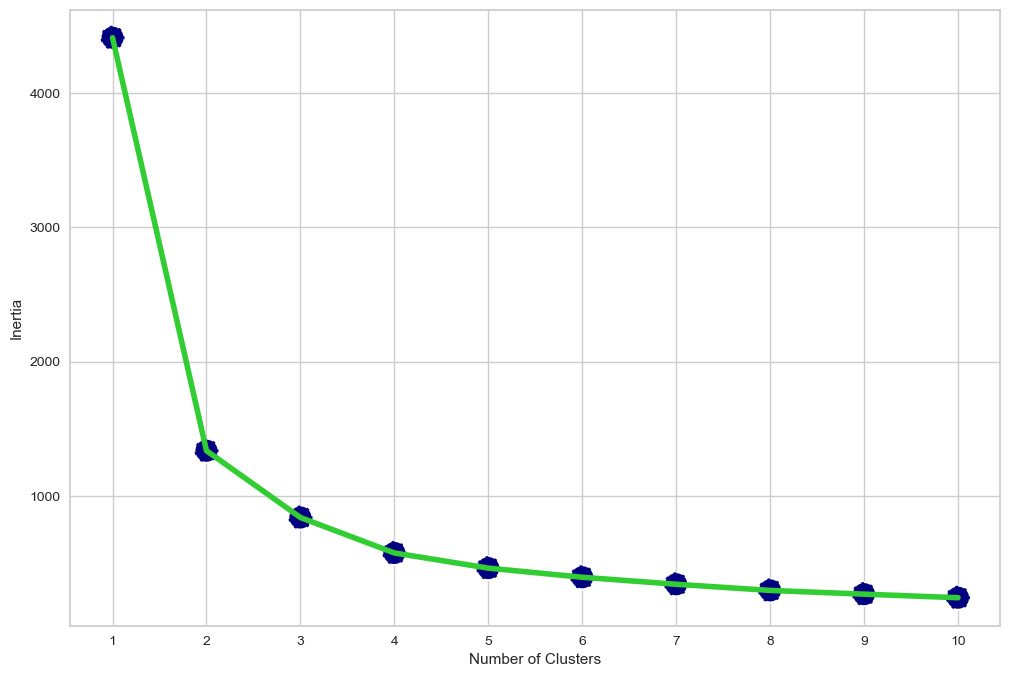

In [117]:
from sklearn.cluster import KMeans
col_model=['Income', 'total_spent']
X=df_scaled[col_model].copy()
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia, color='limegreen', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='navy',  linestyle='--')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [118]:
print(inertia)

[4410.0, 1336.2667065205642, 839.2496185073078, 575.5594524025789, 462.6872676765894, 394.7297935996947, 342.4258919632048, 296.71657052391345, 268.84136224043834, 242.30136076702158]


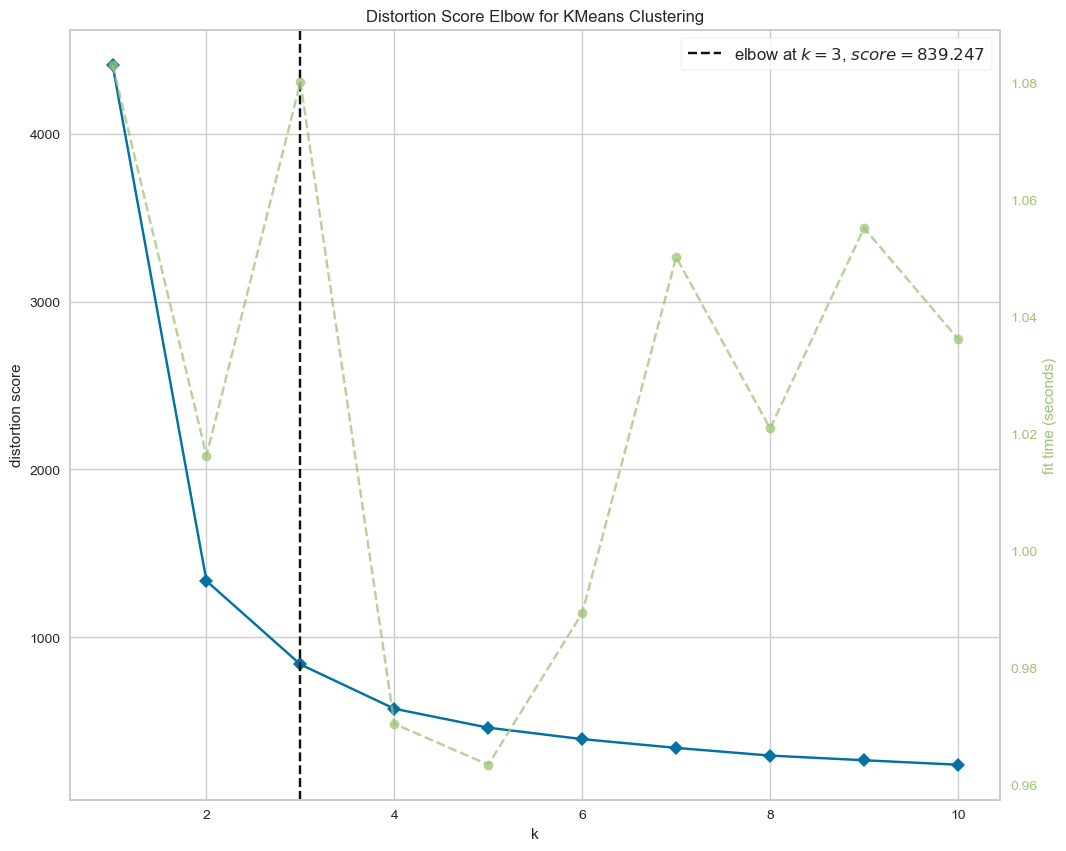

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(12, 10))

# fit model
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(X.values)       
visualizer.show()

Dari grafik tersebut, kita bisa melihat bahwa penurunan yang signifikan terjadi dari 1 kluster hingga 3 kluster, kemudian penurunan masih terjadi tapi dengan laju yang lebih lambat. Hal ini bisa menunjukkan bahwa memilih 3 kluster mungkin merupakan pilihan yang baik, karena penambahan kluster setelah itu memberikan penurunan inertia yang lebih sedikit.

In [120]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

for i in range(2,11):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k(clusters) = 2 is 0.5830231435083415
Silhouette score for k(clusters) = 3 is 0.4830434552196184
Silhouette score for k(clusters) = 4 is 0.43824545447372804
Silhouette score for k(clusters) = 5 is 0.4116509676574564
Silhouette score for k(clusters) = 6 is 0.3790765972183669
Silhouette score for k(clusters) = 7 is 0.3846618747018412
Silhouette score for k(clusters) = 8 is 0.3817581188721383
Silhouette score for k(clusters) = 9 is 0.3939002564592509
Silhouette score for k(clusters) = 10 is 0.3891616756453343


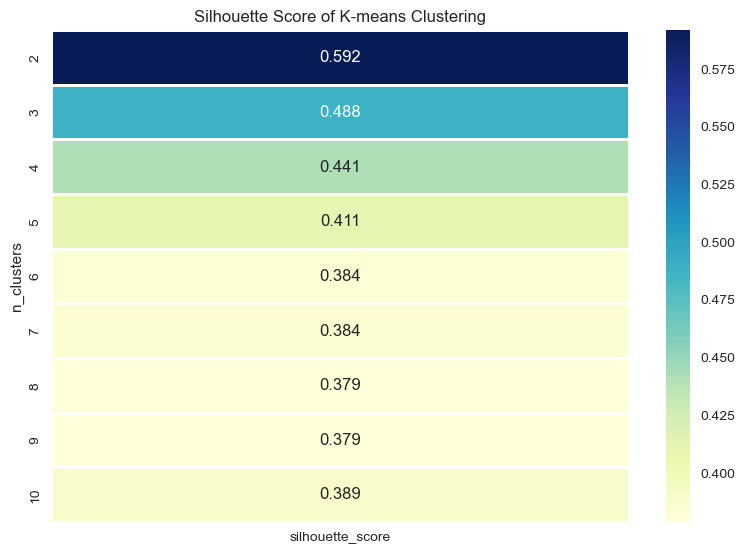

In [121]:
from sklearn.metrics import silhouette_score

def visualizer_silhouette_layer(data):
    clusters_range = range(2, 11)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result_silhouette = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km_silhouette = pd.pivot_table(result_silhouette, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km_silhouette, annot=True, linewidths=1, fmt='.3f', cmap='YlGnBu')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()
    
visualizer_silhouette_layer(X)

 berdasarkan hasil tersebut, kita dapat mencatat bahwa pemisahan data ke dalam dua Cluster memiliki kualitas yang lebih baik daripada jumlah Cluster lainnya yang diuji.

# Insight

In [122]:
from sklearn.cluster import KMeans

# fitting model
kmeans = KMeans(n_clusters = 3, random_state = 0)
kc = kmeans.fit(X.values)
X['Cluster'] = kmeans.labels_
df_cast['Cluster'] = kmeans.labels_

# Menambah kolom cluster
display(df_cast.groupby('Cluster')['total_spent','Income'].agg(['count','mean']))

total_spent               Income              
              count          mean  count          mean
Cluster                                               
0               526  1.494454e+06    526  7.707215e+07
1               670  6.565284e+05    670  5.996666e+07
2              1009  1.110852e+05   1009  3.281378e+07

 setiap cluster memiliki karakteristik yang berbeda dalam hal total pembelian dan pendapatan. Misalnya, Cluster 2 memiliki total pembelian yang tinggi tetapi hanya terdiri dari 1 data, sementara Cluster 0 memiliki total pembelian tertinggi kedua tetapi dengan jumlah data yang lebih banyak. Hal ini menunjukkan bahwa hasil clustering dapat memberikan wawasan yang berharga tentang pola dan karakteristik dari data yang dianalisis.

#### Persentase Customer

In [123]:
cnt_cluster = df_cast['Cluster'].value_counts().reset_index()
cnt_cluster.columns = ['Cluster', 'count']
cnt_cluster['Persen (%)'] = round((cnt_cluster['count']/len(df_cast))*100,2)
cnt_cluster = cnt_cluster.sort_values(by=['Cluster']).reset_index(drop=True)
cnt_cluster

,Cluster,count,Persen (%)
0,0,526,23.85
1,1,670,30.39
2,2,1009,45.76


#### Tempelkan label cluster ke dataframe asal dan keluarkan fitur statistik

In [124]:
df_cluster = df_cast.groupby(['Cluster']).agg({'total_spent': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['count', 'mean', 'median', 'min', 'max'],
                                                'conversion_rate':['count', 'mean', 'median', 'min', 'max']
                                                 }).reset_index()
df_cluster

Cluster total_spent                                           Income  \
                count          mean     median     min      max  count   
0       0         526  1.494454e+06  1454000.0  809000  2525000    526   
1       1         670  6.565284e+05   660500.0   18000  1396000    670   
2       2        1009  1.110852e+05    64000.0    5000  1730000   1009   

                                                     conversion_rate  \
           mean      median         min          max           count   
0  7.707215e+07  77184000.0  48192000.0  105471000.0             526   
1  5.996666e+07  59147500.0  42000000.0  113734000.0             670   
2  3.281378e+07  34026000.0   1730000.0   54466000.0            1009   

                                  
       mean    median  min   max  
0  9.300210  7.666667  0.0  28.0  
1  5.037236  4.000000  1.0  27.0  
2  1.400416  1.166667  0.0  43.0

Cluster 0: Pelanggan dengan pengeluaran tinggi dan tingkat konversi yang tinggi, mungkin merupakan pelanggan premium yang responsif terhadap tawaran pemasaran.

Cluster 1: Pelanggan dengan pengeluaran menengah dan pendapatan menengah, mungkin merupakan pelanggan reguler dengan tingkat konversi yang stabil.

Cluster 2: Pelanggan dengan pengeluaran rendah dan pendapatan rendah, mungkin merupakan pelanggan yang lebih hemat dan memiliki tingkat konversi yang rendah.

               Income  total_spent
Cluster                           
0        4.053995e+10    786083000
1        4.017766e+10    439874000
2        3.310910e+10    112085000


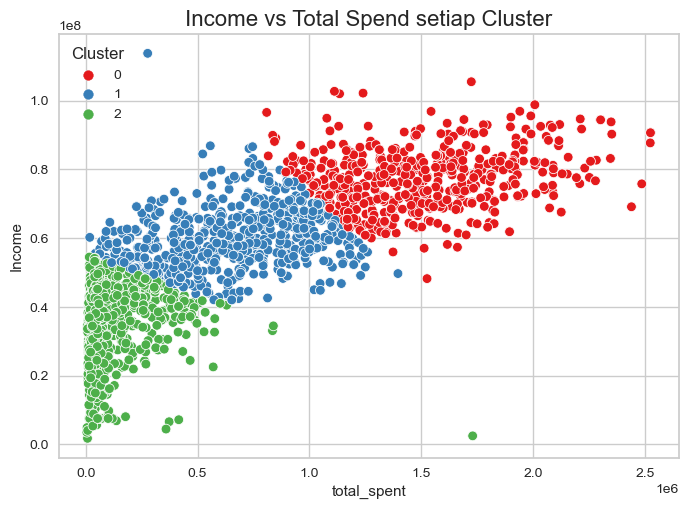

In [125]:
print(df_cast.groupby(['Cluster'])[['Income', 'total_spent']].agg('sum'))
spentscatter = sns.scatterplot(data = df_cast,x=df_cast["total_spent"], y=df_cast["Income"],hue=df_cast["Cluster"], palette= 'Set1')
spentscatter.set_title('Income vs Total Spend setiap Cluster', fontsize=16)
plt.show()

#### berdasarkan income dan total_spent

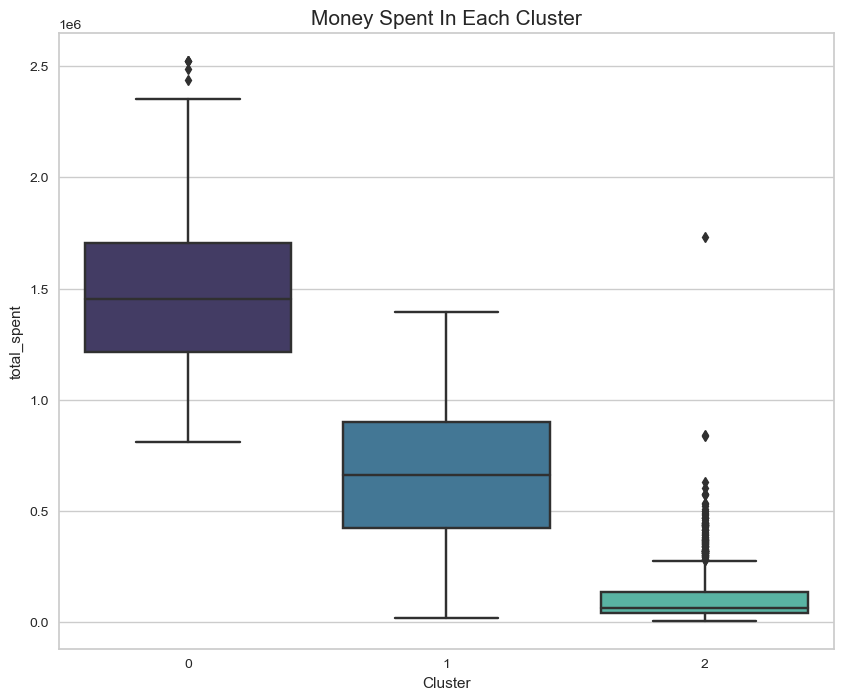

In [145]:
plt.figure(figsize=(10,8))
spentbox = sns.boxplot(x=df_cast["Cluster"], y=df_cast["total_spent"], palette='mako')
spentbox.set_title("Money Spent In Each Cluster", size=15)
plt.show()

- Cluster 0 merupakan High Spender dengan rata-rata total belanja tertinggi di antara ketiga cluster. Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam total belanja di dalam cluster ini.
- Cluster 1 merupakan Mid Spender dengan rata-rata total belanja di tengah-tengah antara Cluster 0 dan Cluster 2. Standar deviasi yang cukup besar menunjukkan variasi yang signifikan dalam total belanja di dalam cluster ini.
- Cluster 2 merupakan Low Spender dengan rata-rata total belanja terendah di antara ketiga cluster. Standar deviasi yang lebih rendah menunjukkan tingkat variasi yang lebih rendah dalam total belanja di dalam cluster ini.

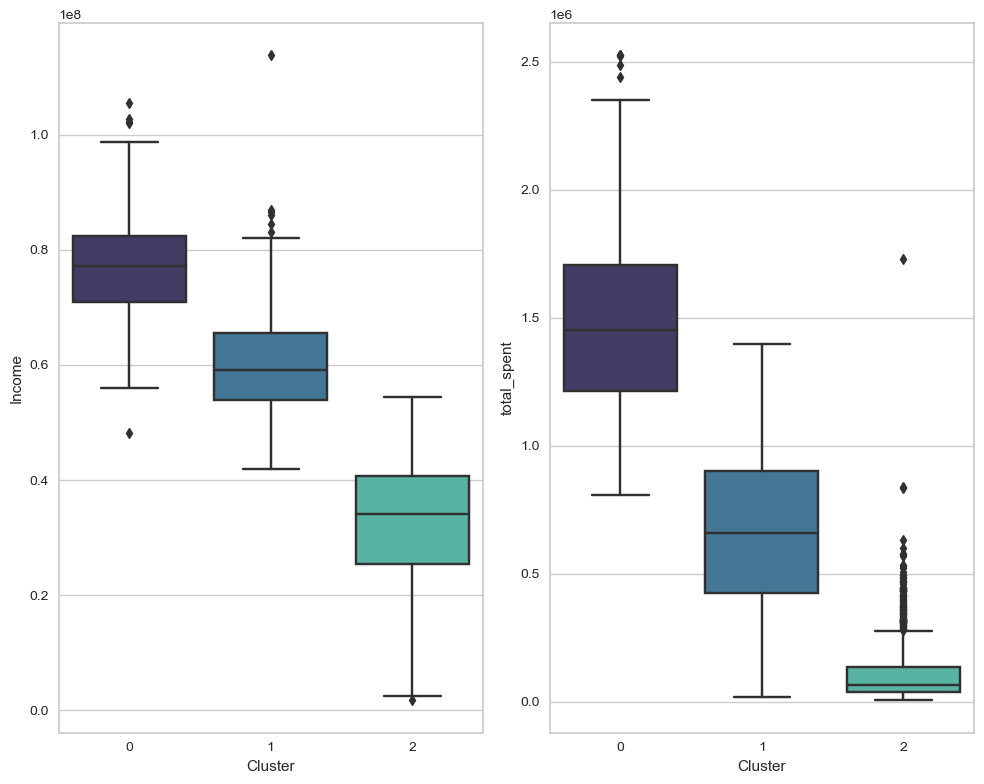

In [144]:
clustercats=['Income','total_spent']
plt.figure(figsize=(10, 8))
for i in range(0, len(clustercats)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df_cast['Cluster'], y=df_clean[clustercats[i]],palette='mako')
    plt.xlabel('Cluster')
    plt.tight_layout()
plt.show()

**Income:**
- Cluster 0 memiliki rata-rata pendapatan (income) tertinggi di antara ketiga cluster, dengan standar deviasi yang juga cukup tinggi, menunjukkan variasi yang signifikan dalam pendapatan di dalam cluster ini.
- Cluster 1 memiliki rata-rata pendapatan yang lebih rendah dibandingkan dengan Cluster 0, namun standar deviasinya juga cukup besar, menunjukkan variasi yang signifikan dalam pendapatan di dalam cluster ini.
- Cluster 2 memiliki rata-rata pendapatan yang paling rendah di antara ketiga cluster, dengan standar deviasi yang lebih rendah dibandingkan Cluster 0 dan 1, menunjukkan tingkat variasi yang lebih rendah dalam pendapatan di dalam cluster ini.

**Total Spent:**
- Cluster 0 memiliki rata-rata total belanja (total_spent) yang paling tinggi di antara ketiga cluster, dengan standar deviasi yang juga cukup tinggi, menunjukkan variasi yang signifikan dalam total belanja.
- Cluster 1 memiliki rata-rata total belanja yang lebih rendah dibandingkan dengan Cluster 0, namun standar deviasinya juga cukup besar, menunjukkan variasi yang signifikan dalam total belanja di dalam cluster ini.
- Cluster 2 memiliki rata-rata total belanja yang paling rendah di antara ketiga cluster, dengan standar deviasi yang lebih rendah dibandingkan Cluster 0 dan 1, menunjukkan tingkat variasi yang lebih rendah dalam total belanja di dalam cluster ini.

**Kesimpulan:**
- Cluster 0 dapat dianggap sebagai "High Spender" karena memiliki rata-rata pendapatan yang tinggi ($77,072,150) dan total belanja ($1,494,454) tertinggi di antara ketiga cluster.
- Cluster 1 dapat dianggap sebagai "Mid Spender" karena memiliki rata-rata pendapatan ($59,966,660) dan total belanja ($656,528) di antara Cluster 0 dan 2.
- Cluster 2 dapat dianggap sebagai "Low Spender" karena memiliki rata-rata pendapatan ($32,813,780) dan total belanja ($111,085) terendah di antara ketiga cluster.

#### berdasarkan total_acc_campaign

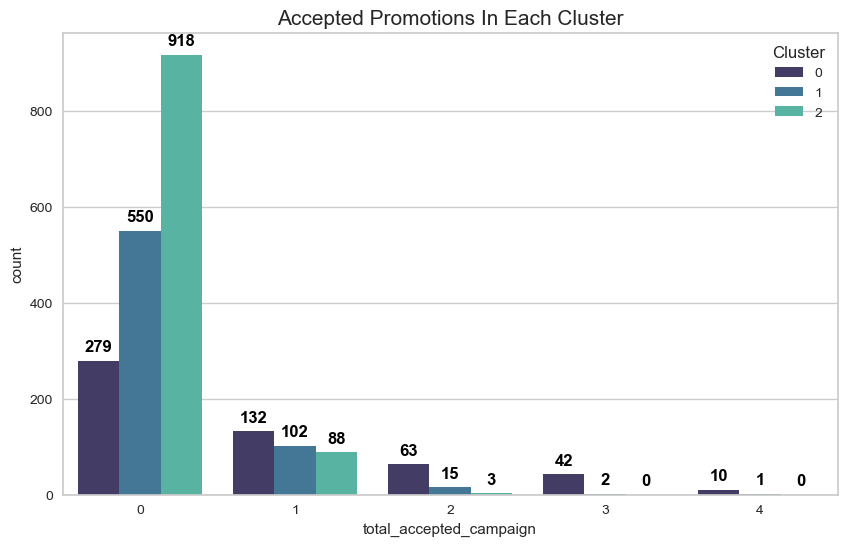

In [128]:
plt.figure(figsize=(10, 6))
total_acc_campaign = sns.countplot(x=df_cast['total_accepted_campaign'], hue=df_cast['Cluster'], palette='mako')

# Menambahkan anotasi di atas setiap bar
for p in total_acc_campaign.patches:
    total_acc_campaign.annotate(format(p.get_height(), '.0f'),
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center',
                                xytext=(0, 10),
                                textcoords='offset points',
                                fontsize=12,
                                color='black',
                                fontweight='bold')

total_acc_campaign.set_title("Accepted Promotions In Each Cluster", size=15)
plt.show()

Cluster 0 memiliki sebagian besar pelanggan yang tidak menerima promosi (279 pelanggan), diikuti oleh 132 pelanggan yang menerima 1 promosi, 63 pelanggan yang menerima 2 promosi, dan seterusnya.
Cluster 1 memiliki pola yang mirip dengan Cluster 0, namun dengan jumlah yang lebih tinggi. Mayoritas pelanggan Cluster 1 tidak menerima promosi (550 pelanggan), diikuti oleh 102 pelanggan yang menerima 1 promosi, dan jumlah yang semakin sedikit untuk promosi yang lebih banyak.
Cluster 2 memiliki pola yang berbeda, dengan mayoritas pelanggan menerima 0 promosi (918 pelanggan), diikuti oleh 88 pelanggan yang menerima 1 promosi, dan hanya sedikit yang menerima 2 promosi.

#### Berdasarkan Web visit dari masing-masing cluster

          count      mean       std  min  25%  50%  75%   max
Cluster                                                      
0         526.0  3.266160  2.074212  0.0  2.0  3.0  5.0   9.0
1         670.0  4.955224  2.043129  1.0  3.0  5.0  7.0   9.0
2        1009.0  6.669970  1.900580  0.0  6.0  7.0  8.0  20.0


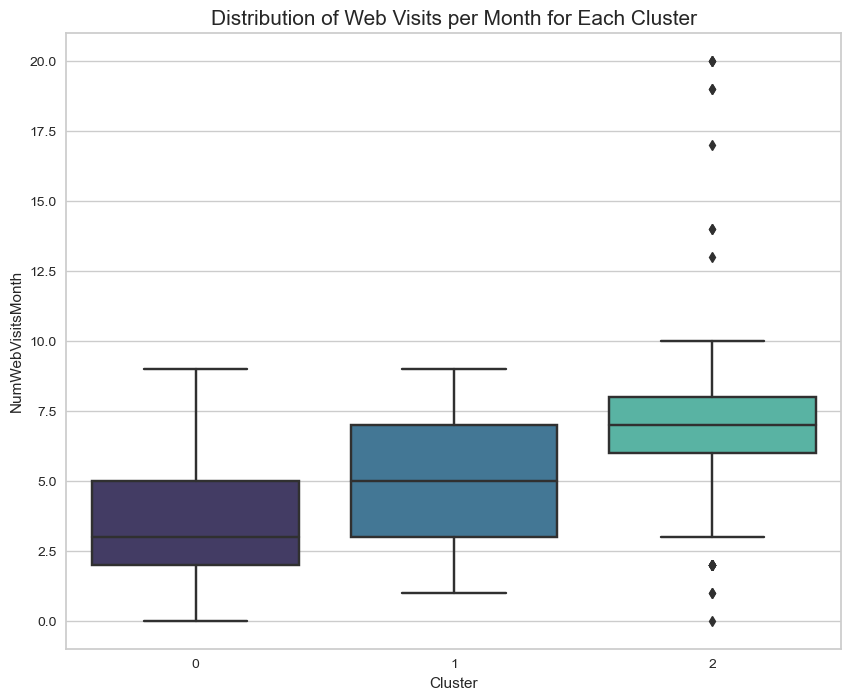

In [166]:
print(df_cast.groupby(['Cluster'])['NumWebVisitsMonth'].describe())
plt.figure(figsize=(10, 8))
web_visit = sns.boxplot(x='Cluster', y='NumWebVisitsMonth', data=df_cast, palette='mako')
web_visit.set_title("Distribution of Web Visits per Month for Each Cluster", size=15)
plt.show()

**Interpretasi:**

- **Cluster 0** memiliki rata-rata kunjungan web per bulan sekitar 3, dengan sebagian besar data berada di rentang 2 hingga 5 kunjungan.
- **Cluster 1** memiliki rata-rata kunjungan web per bulan sekitar 5, dengan sebagian besar data berada di rentang 3 hingga 7 kunjungan.
- **Cluster 2** memiliki rata-rata kunjungan web per bulan sekitar 7, dengan sebagian besar data berada di rentang 6 hingga 8 kunjungan. Terdapat beberapa nilai pencilan yang mencapai 20 kunjungan.

**Kesimpulan:**

- **Cluster 2** adalah kelompok dengan jumlah kunjungan web per bulan tertinggi di antara ketiga Cluster, menunjukkan tingkat aktivitas online yang lebih tinggi.
- **Cluster 1** berada di posisi tengah dengan jumlah kunjungan web per bulan yang lebih rendah dari Cluster 2 namun lebih tinggi dari Cluster 0.
- **Cluster 0** adalah kelompok dengan jumlah kunjungan web per bulan terendah, menunjukkan tingkat aktivitas online yang lebih rendah dibandingkan dengan kedua Cluster lainnya.


#### berdasarkan customer profile

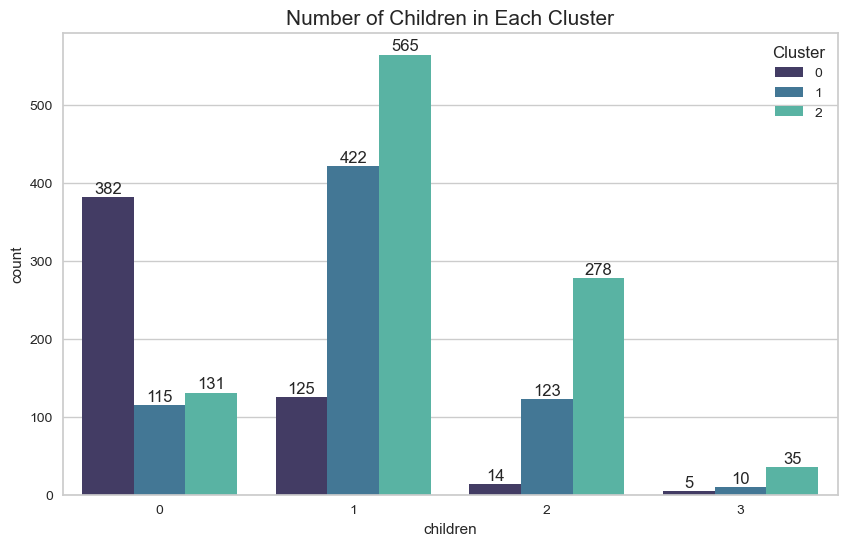

In [130]:
plt.figure(figsize=(10, 6))
num_child_cluster = sns.countplot(x=df_cast['children'], hue=df_cast['Cluster'], palette='mako')

# Menambahkan anotasi di atas setiap bar
for p in num_child_cluster.patches:
    height = p.get_height()
    num_child_cluster.text(p.get_x() + p.get_width() / 2, height + 5, int(height), ha='center')

num_child_cluster.set_title("Number of Children in Each Cluster", size=15)
plt.show()

Kesimpulan:
- Cluster 0 cenderung memiliki anggota tanpa anak atau dengan 1 anak.
- Cluster 1 cenderung memiliki anggota dengan 1 anak, tetapi juga memiliki sejumlah anggota tanpa anak atau dengan 2 anak.
- Cluster 2 cenderung memiliki anggota dengan 1 anak atau 2 anak, dengan jumlah yang cukup signifikan.

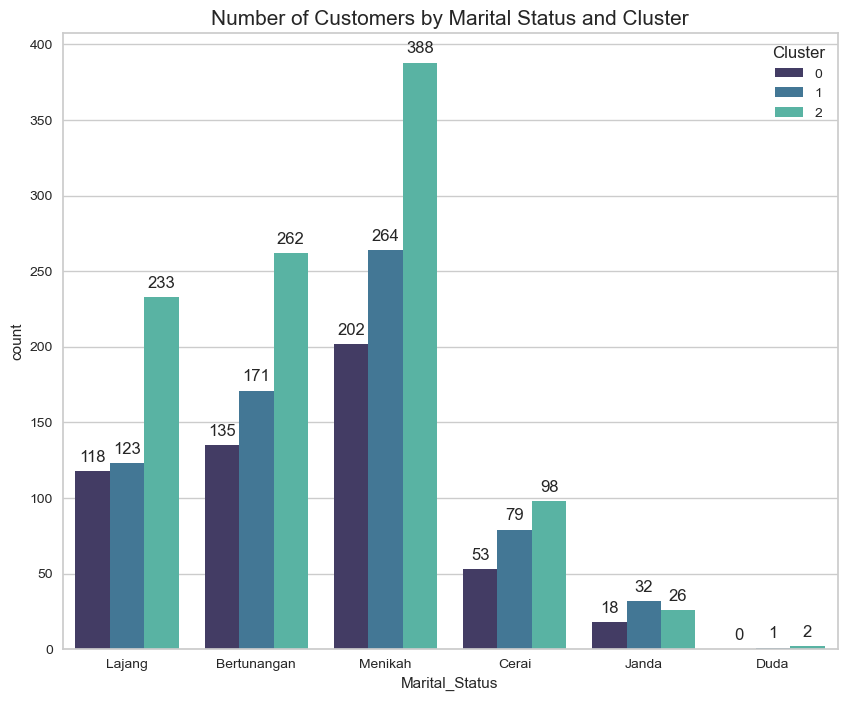

In [189]:
plt.figure(figsize=(10, 8))
num_customers_by_marital_status = sns.countplot(x=df_cast['Marital_Status'], hue=df_cast['Cluster'], palette='mako')

# Menambahkan anotasi pada setiap bar
for p in num_customers_by_marital_status.patches:
    num_customers_by_marital_status.annotate(format(p.get_height(), '.0f'), 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', 
                               xytext = (0, 10), 
                               textcoords = 'offset points')

num_customers_by_marital_status.set_title("Number of Customers by Marital Status and Cluster", size=15)
plt.show()

- Cluster 0: Mayoritas pelanggan dalam cluster ini adalah yang sudah menikah (Menikah), diikuti oleh pelanggan yang masih lajang (Lajang). Jumlah pelanggan yang bertunangan (Bertunangan) dan cerai (Cerai) juga signifikan, namun jumlah pelanggan janda (Janda) relatif lebih sedikit.
- Cluster 1: Juga didominasi oleh pelanggan yang sudah menikah (Menikah), dengan jumlah yang lebih sedikit untuk status pernikahan lainnya. Terdapat satu pelanggan dengan status duda (Duda).
- Cluster 2: Sama seperti Cluster 0, cluster ini juga didominasi oleh pelanggan yang sudah menikah (Menikah), diikuti oleh pelanggan yang masih lajang (Lajang) dan bertunangan (Bertunangan). Jumlah pelanggan dengan status pernikahan lainnya (Cerai, Duda, Janda) relatif lebih sedikit.

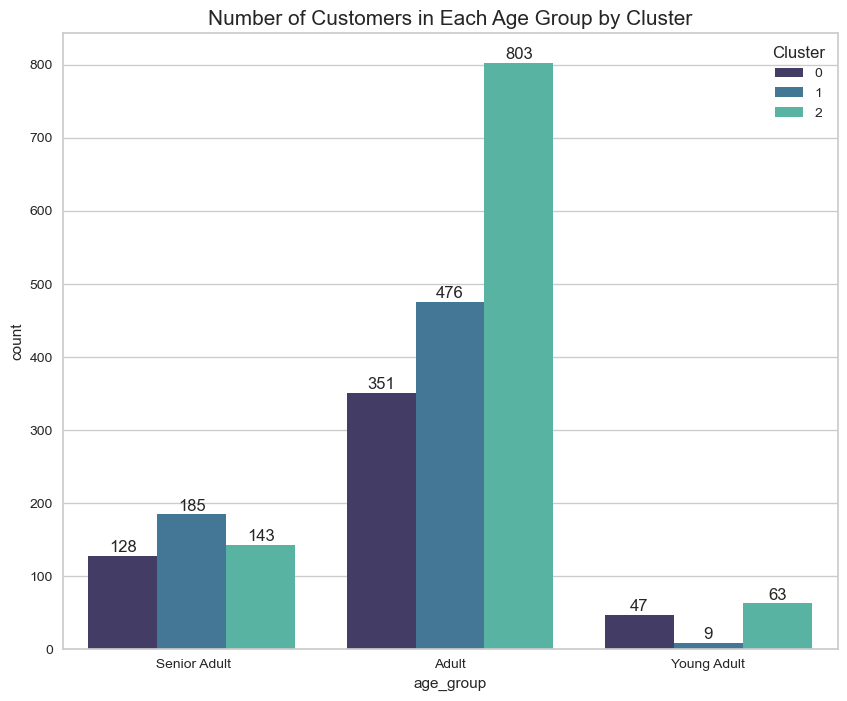

In [163]:
plt.figure(figsize=(10, 8))
age_group_cluster = sns.countplot(x=df_cast['age_group'], hue=df_cast['Cluster'], palette='mako')

# Menambahkan anotasi di atas setiap bar
for p in age_group_cluster.patches:
    height = p.get_height()
    age_group_cluster.text(p.get_x() + p.get_width() / 2, height + 5, int(height), ha='center')

age_group_cluster.set_title("Number of Customers in Each Age Group by Cluster", size=15)
plt.show()

- Cluster 0 memiliki sebagian besar pelanggan dewasa (Adult) dengan jumlah yang signifikan dari kelompok usia Senior Adult, tetapi hanya sedikit pelanggan dari kelompok usia Young Adult.
- Cluster 1 juga didominasi oleh pelanggan dewasa (Adult), tetapi memiliki jumlah pelanggan Senior Adult yang lebih sedikit dibandingkan dengan Cluster 0. Cluster ini hampir tidak memiliki pelanggan dari kelompok usia Young Adult.
- Cluster 2 memiliki sebagian besar pelanggan dewasa (Adult) dengan jumlah yang signifikan dari kelompok usia Senior Adult, tetapi memiliki proporsi pelanggan dari kelompok usia Young Adult yang lebih tinggi dibandingkan dengan Cluster 0 dan 1.

#### berdasarkan riwayat transaksi

          count      mean       std  min  25%  50%  75%   max
Cluster                                                      
0         526.0  1.562738  1.575666  0.0  1.0  1.0  1.0  13.0
1         670.0  3.061194  2.181760  0.0  1.0  2.0  4.0  15.0
2        1009.0  2.219029  1.628307  0.0  1.0  2.0  3.0  15.0
          count      mean       std  min  25%  50%  75%   max
Cluster                                                      
0         526.0  5.442966  2.355860  1.0  4.0  5.0  7.0  11.0
1         670.0  5.743284  2.495390  0.0  4.0  6.0  7.0  27.0
2        1009.0  2.310208  1.848934  0.0  1.0  2.0  3.0  25.0
          count      mean       std  min  25%  50%  75%   max
Cluster                                                      
0         526.0  5.916350  2.269600  2.0  4.0  6.0  7.0  11.0
1         670.0  3.162687  2.160685  0.0  2.0  3.0  4.0  11.0
2        1009.0  0.596630  1.175489  0.0  0.0  0.0  1.0  28.0
          count      mean       std  min  25%  50%   75%   max
Cluster

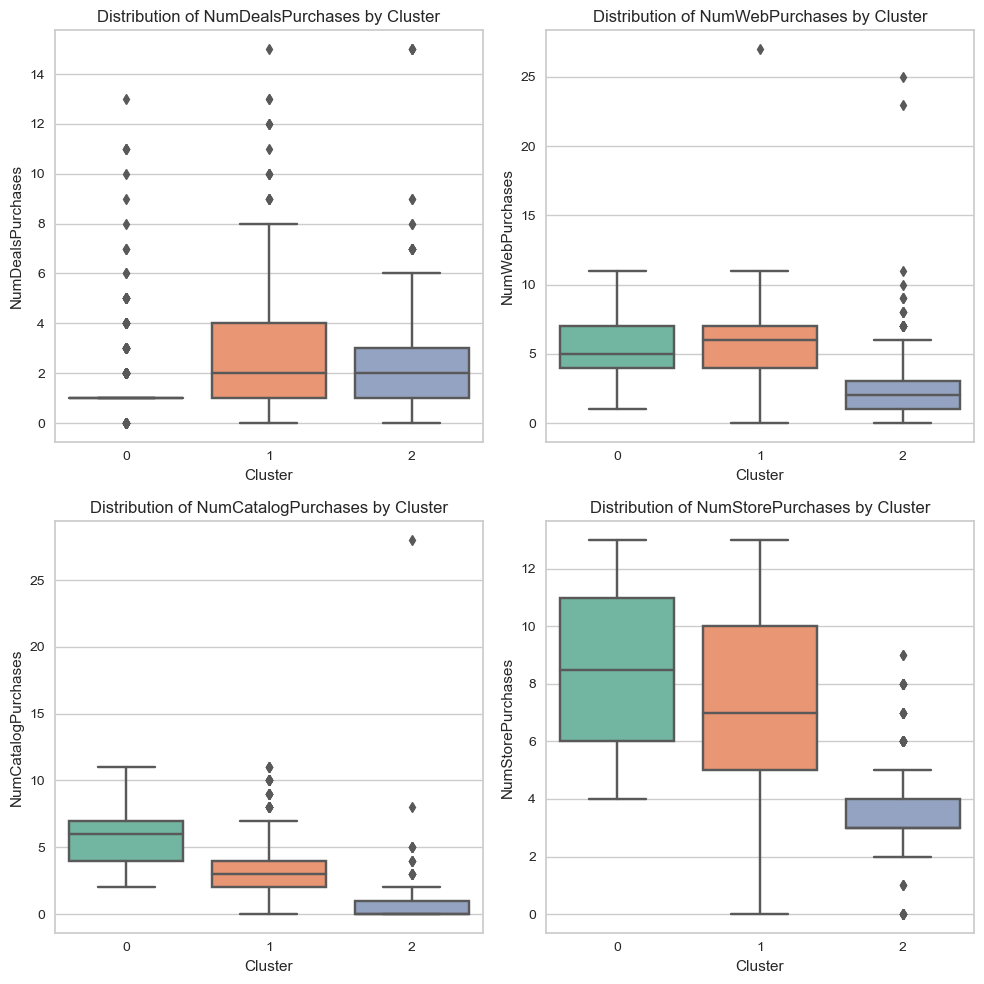

In [168]:
transaksi=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(10, 10))
for i in range(0, len(transaksi)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_cast['Cluster'], y=df_cast[transaksi[i]], palette='Set2')
    plt.xlabel('Cluster')
    plt.title(f'Distribution of {transaksi[i]} by Cluster')
plt.tight_layout()
plt.show()

- Cluster 0 cenderung menjadi cluster dengan pola pembelian paling tinggi untuk hampir semua kategori pembelian.
- Cluster 1 memiliki pola pembelian yang cukup tinggi, terutama dalam pembelian melalui web dan katalog.
- Cluster 2 cenderung menjadi cluster dengan pola pembelian paling rendah untuk hampir semua kategori pembelian, terutama dalam pembelian melalui web dan katalog.

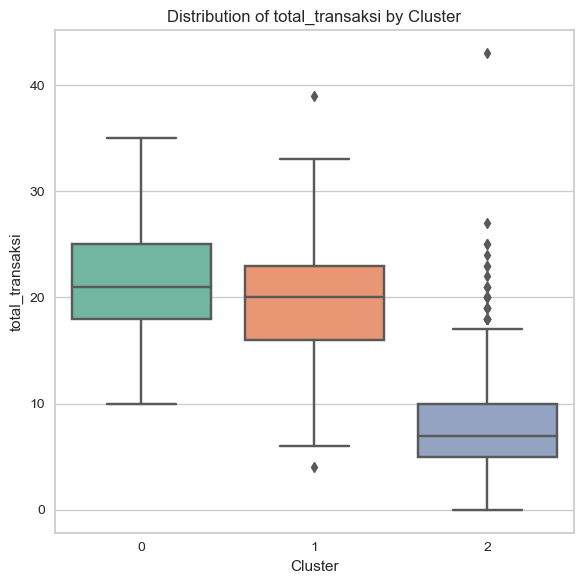

In [162]:
transaksi=['total_transaksi']
plt.figure(figsize=(6, 6))
for i in range(0, len(transaksi)):
    ax = plt.subplot(1, 1, i+1)
    sns.boxplot(x=df_cast['Cluster'], y=df_cast[transaksi[i]], palette='Set2')
    plt.xlabel('Cluster')
    plt.title(f'Distribution of {transaksi[i]} by Cluster')
plt.tight_layout()
plt.show()

- Cluster 0 cenderung menjadi cluster dengan frekuensi transaksi tertinggi.
- Cluster 1 memiliki frekuensi transaksi yang cukup tinggi, meskipun sedikit lebih rendah dari Cluster 0.
- Cluster 2 cenderung menjadi cluster dengan frekuensi transaksi paling rendah di antara ketiga cluster.

## summary

Berdasarkan analisis cluster, pelanggan dapat dikelompokkan menjadi tiga kategori utama: High Spender, Mid Spender, dan Low Spender.

1. **High Spender (Cluster 0):**
   - Memiliki total belanja dan pendapatan tertinggi di antara Cluster.
   - Cenderung kurang aktif secara online namun lebih suka berbelanja langsung di toko atau melalui katalog.
   - Mayoritas tidak tertarik pada promosi.
   - Didominasi oleh pelanggan yang sudah menikah dengan satu atau tanpa anak.

2. **Mid Spender (Cluster 1):**
   - Memiliki total belanja dan pendapatan sedang.
   - Aktivitas online sedang, dengan jumlah kunjungan web dan pembelian melalui web yang cukup.
   - Kurang tertarik pada promosi.
   - Didominasi oleh pelanggan yang sudah menikah dengan satu anak, tetapi juga termasuk yang tanpa anak atau dengan dua anak.

3. **Low Spender (Cluster 2):**
   - Memiliki total belanja dan pendapatan terendah di antara Cluster.
   - Aktivitas online tinggi, dengan rata-rata kunjungan web per bulan tertinggi.
   - Tertarik pada promosi, dengan sebagian besar menerima sedikit atau tidak ada promosi.
   - Didominasi oleh pelanggan yang sudah menikah dengan satu atau dua anak.

# Potential Impact

In [188]:
potential_impact = df_cast.groupby('Cluster')['total_spent'].agg(['sum']).reset_index()
potential_impact

,Cluster,sum
0,0,786083000
1,1,439874000
2,2,112085000


Hasilnya menunjukkan total pengeluaran untuk masing-masing cluster pelanggan:

- Cluster 0 memiliki total pengeluaran sebesar 786,083,000.
- Cluster 1 memiliki total pengeluaran sebesar 439,874,000.
- Cluster 2 memiliki total pengeluaran sebesar 112,085,000.

Kesimpulannya, cluster pelanggan dengan Cluster 0 memiliki total pengeluaran tertinggi, diikuti oleh Cluster 1 dan Cluster 2.

In [191]:
# Jumlah potensial penghematan dari optimalisasi biaya promosi (dengan asumsi pengurangan target 50%)
potensi_penghematan = (df_cast[df_cast.Cluster == 2]['total_spent'].sum() / df_cast[df_cast.Cluster == 2]
                       ['total_transaksi'].sum()) * df_cast[df_cast.Cluster == 2]['NumDealsPurchases'].sum() * 0.5

print("Potensi Penghematan:", potensi_penghematan)

Potensi Penghematan: 14835558.938283283


Syntax ini menghitung potensi penghematan biaya promosi dengan asumsi pengurangan target sebesar 50% untuk pelanggan dalam Cluster 2 (Low Spender). Potensi penghematan dihitung dengan cara mengalikan rata-rata total belanja per transaksi dengan jumlah transaksi dan jumlah promo yang berhasil dikonversi, kemudian hasilnya dikalikan dengan 0.5 untuk mencerminkan pengurangan target 50%.

Dari hasil tersebut, potensi penghematan biaya promosi untuk pelanggan dalam Cluster 2 adalah sebesar 14,835,558.94. Ini berarti dengan mengurangi biaya promosi sebesar 50%, perusahaan berpotensi menghemat jumlah tersebut dari biaya promosi yang sebelumnya dikeluarkan. Hal ini dapat memberikan dampak positif bagi profitabilitas perusahaan dengan mengurangi biaya operasional tanpa mengorbankan kinerja pemasaran.